In [323]:
import pandas as pd
import seaborn as sns
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Read Loan CSV

In [324]:
loan = pd.read_csv("loan.csv")

In [325]:
#Checking the shape of Loan
loan.shape

(39717, 111)

In [326]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Understanding and Clenaing
<h3>Treat the missing Values</h3>
Check is there null values for entire row or entire column

In [327]:
print(loan.isnull().all(axis=0))
print("-----------------------------------------------------------------------------------")
print("Entire Row null values")
loan[(loan.isnull().all(axis=1) == True)]

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
                              ...  
tax_liens                     False
tot_hi_cred_lim                True
total_bal_ex_mort              True
total_bc_limit                 True
total_il_high_credit_limit     True
Length: 111, dtype: bool
-----------------------------------------------------------------------------------
Entire Row null values


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


<h4>There is no row has all null values</h4>
<br>
<h4>Check how many columns has null all the null values</h4>

In [328]:
loan.isnull().all(axis=0).sum()

54

<h4>removing columns whihc is having all null values</h4>

In [329]:
loan = loan.dropna(axis=1, how='all')

 Let us check the shape of the loan

In [330]:
print("Let us check the shape of the loan")
print(loan.shape)
print(loan.isnull().sum())

Let us check the shape of the loan
(39717, 57)
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line 

# checking for the duplicates 

In [331]:
print(loan.duplicated(subset=None, keep='first').count())
print(loan[loan.duplicated(['id'])])
print("there is not duplicated rows defined")

39717
Empty DataFrame
Columns: [id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, policy_code, application_type, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, pub_rec_bankruptcies, tax_liens]
Index: []

[0 rows x 57 columns]
there is not duplicated rows defined


<h3>Check the null values percentage in loan</h3>


In [332]:
 print(loan.isnull().sum() * 100 / len(loan))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


<h3>Removing the columns with high null value percentage and not used for the lending club analysis</h3>

In [333]:
columnList =  ["desc", "mths_since_last_delinq", "mths_since_last_record", "next_pymnt_d", 'tax_liens', 'zip_code', "collections_12_mths_ex_med", "policy_code", "mths_since_last_record", "next_pymnt_d", "url", 'member_id', 'pymnt_plan', 'application_type', 'last_pymnt_d', 'last_pymnt_amnt', 'acc_now_delinq', 'delinq_amnt', 'chargeoff_within_12_mths']
loan.drop(labels = columnList, axis =1, inplace=True)

In [334]:
print("check the shape of the loan")
print(loan.shape)
print("--------------------------------------")
print("again check the percentage of null values")
print(loan.isnull().sum() * 100 / len(loan))
print("--------------------------------------")
print("check the sample data")
loan.head(5)

check the shape of the loan
(39717, 40)
--------------------------------------
again check the percentage of null values
id                         0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.191303
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.027696
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec        

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,0.0


# clean the data
Removing the percentage symbol from int_Rate column

In [335]:
loan["int_rate"] = loan["int_rate"].str.replace("%", "")

In [336]:
print(loan["term"].value_counts())
print("---------------------------------")
print("Removing Months from term column")
loan["term"] = loan["term"].str.replace("months", "")
print(loan["term"].value_counts())

 36 months    29096
 60 months    10621
Name: term, dtype: int64
---------------------------------
Removing Months from term column
 36     29096
 60     10621
Name: term, dtype: int64


In [337]:
print(loan["emp_length"].value_counts())
print("----------------------------------")
print("after removing the year < > + symbols from emp_length")
loan['emp_length']=loan.emp_length.str.extract('(\d+)')
print(loan["emp_length"].value_counts())

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64
----------------------------------
after removing the year < > + symbols from emp_length
10    8879
1     7823
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
Name: emp_length, dtype: int64


In [338]:
print(loan["revol_util"].value_counts())
print("----------------------------------")
print("after % from revol_util")
loan["revol_util"] = loan["revol_util"].str.replace("%", "")
print(loan["revol_util"].value_counts())

0%        977
0.20%      63
63%        62
0.10%      58
40.70%     58
         ... 
13.56%      1
33.26%      1
47.36%      1
0.16%       1
37.73%      1
Name: revol_util, Length: 1089, dtype: int64
----------------------------------
after % from revol_util
0        977
0.20      63
63        62
0.10      58
66.70     58
        ... 
33.14      1
33.26      1
77.63      1
57.56      1
94.46      1
Name: revol_util, Length: 1089, dtype: int64


# Data Type modification

In [339]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  object 
 5   int_rate                 39717 non-null  object 
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_title                37258 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [340]:
loan[["term", "int_rate", "emp_length"]] = loan[["term", "int_rate", "emp_length"]].apply(pd.to_numeric)

<h3> afetr changing the datat type </h3>

In [341]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   loan_amnt                39717 non-null  int64  
 2   funded_amnt              39717 non-null  int64  
 3   funded_amnt_inv          39717 non-null  float64
 4   term                     39717 non-null  int64  
 5   int_rate                 39717 non-null  float64
 6   installment              39717 non-null  float64
 7   grade                    39717 non-null  object 
 8   sub_grade                39717 non-null  object 
 9   emp_title                37258 non-null  object 
 10  emp_length               38642 non-null  float64
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [342]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,...,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,May-16,0.0
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,...,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Sep-13,0.0
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,...,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,May-16,0.0
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Apr-16,0.0
4,1075358,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,...,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,0.0


# filling null values

In [343]:
print("before filling na values")
print(loan["emp_length"].isnull().sum())
print("after filling na values")
loan.emp_length.fillna('0',inplace=True)
print(loan["emp_length"].isnull().sum())



before filling na values
1075
after filling na values
0


In [344]:
loan["issue_d"].isnull().sum()


0

There no null values for the columns issue_d

In [345]:
print("before filling na values")
print(loan["pub_rec_bankruptcies"].isnull().sum())
print("after filling na values")
loan.pub_rec_bankruptcies.fillna('0',inplace=True)
print(loan["pub_rec_bankruptcies"].isnull().sum())


before filling na values
697
after filling na values
0


Checking the nullvalue percentage after filling the na values

In [346]:
print(loan.isnull().sum() * 100 / len(loan))

id                         0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.191303
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.027696
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0.125891
total_acc                  0

<h3>Our target variable is Loan_Status, Lets analyze that</h3>

In [347]:
print(loan["loan_status"].value_counts())

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


<h3>since current is one of the status and it means ther borrowers are currenlty paying the emi's<br>
we can drop off current paying rows</h3>

In [348]:
loan = loan[-(loan["loan_status"] == "Current")]

<h3>derived columns</h3>

In [349]:
#lets seperate the month and year for the issue_D

loan["issue_d"] = list(map(lambda x: datetime.strptime(x, '%b-%y').strftime('%m-%Y'), loan["issue_d"]))
loan['year'] = pd.DatetimeIndex(loan['issue_d']).year
loan['month'] = pd.DatetimeIndex(loan['issue_d']).month

In [350]:
print("lets check the shape of the loan")
print(loan.shape)
loan.head(5)

lets check the shape of the loan
(38577, 42)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,year,month
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,...,5833.84,5000.00,863.16,0.00,0.00,0.00,May-16,0,2011,12
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,...,1008.71,456.46,435.17,0.00,117.08,1.11,Sep-13,0,2011,12
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,...,3005.67,2400.00,605.67,0.00,0.00,0.00,May-16,0,2011,12
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Apr-16,0,2011,12
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-16,0,2011,12


# Univariate analysis

Lets check the percentage of <b>loan_Status</b>

In [351]:
loan["loan_status"].value_counts()*100/len(loan)

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

# observations:
<h4>its nearly 14 percentage of loans are defaulted</h4>
Lets start the analysis for getting the variables that should be defaulted

Purpose column

In [352]:
print(loan["purpose"].value_counts())
print("---------------------------------------")
print("percentage of each purpose")
loan["purpose"].value_counts() * 100/ len(loan)

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64
---------------------------------------
percentage of each purpose


debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

# observation
most of the loans taken for their debt_consolidation   and credit carb bill payment  

Annual_income

In [353]:
 df = pd.DataFrame(loan,columns=['loan_amnt','funded_amnt','funded_amnt_inv'])

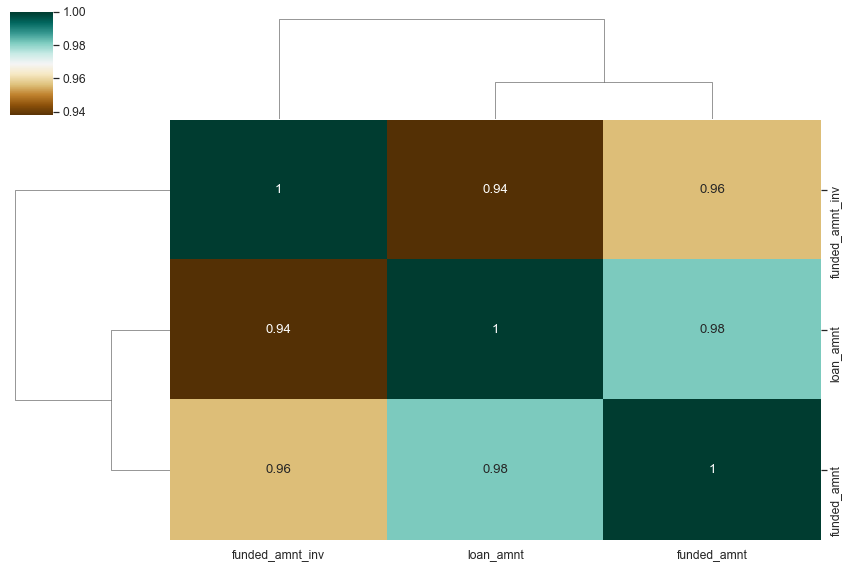

In [354]:
loan_correlation = df.corr()
sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

# Observations: 
    Fundent_amnt_inv , loan_amnt, funded_amnt are strongly correlated to each other

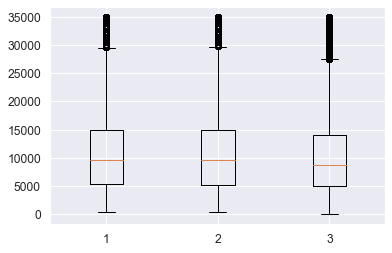

In [355]:
plt.boxplot(df)
plt.show()

box plot of funded_amnt

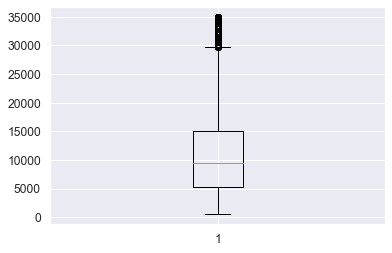

In [356]:
plt.boxplot(loan["funded_amnt"])
plt.show()

In [357]:
#loan amount

loan["loan_amnt"].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

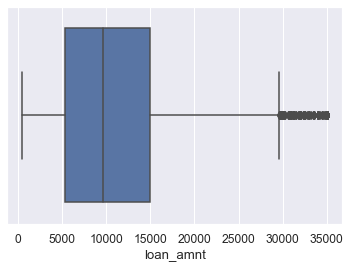

In [358]:
sns.boxplot(loan["loan_amnt"])

Total Payment

In [359]:
loan["total_pymnt"].describe()

count    38577.000000
mean     11866.970365
std       8809.856227
min          0.000000
25%       5513.497338
50%       9674.048405
75%      16136.952430
max      58563.679930
Name: total_pymnt, dtype: float64

annual_inc

In [360]:
loan["annual_inc"].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

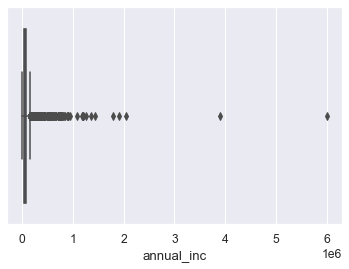

In [361]:
sns.boxplot(loan["annual_inc"])

Annual_income has heavy outliers lets try to remove that

In [362]:
loan = loan[loan["annual_inc"] < loan["annual_inc"].quantile(0.99)]
print("lets check the loan shape")
loan.shape

lets check the loan shape


(38191, 42)

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64


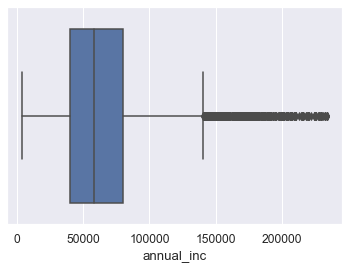

In [363]:
print(loan["annual_inc"].describe())
sns.boxplot(loan["annual_inc"])
plt.show()

In [364]:
loan["int_rate"].value_counts()

10.99    904
11.49    786
7.51     782
13.49    744
7.88     717
        ... 
17.34      1
16.20      1
20.52      1
17.46      1
16.96      1
Name: int_rate, Length: 370, dtype: int64

In [365]:
loan["int_rate"].describe()

count    38191.000000
mean        11.917876
std          3.684108
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

In [366]:
print(loan["pub_rec_bankruptcies"].value_counts())

0.0    35865
1.0     1633
0        688
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


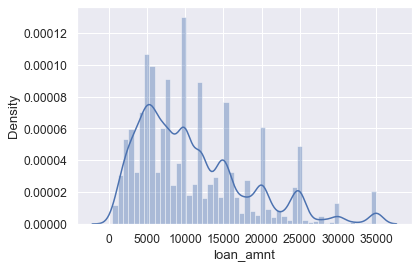

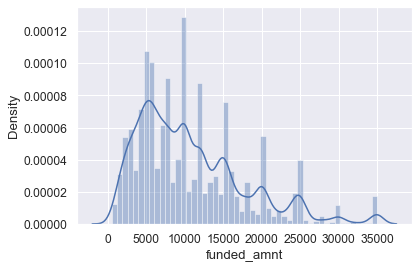

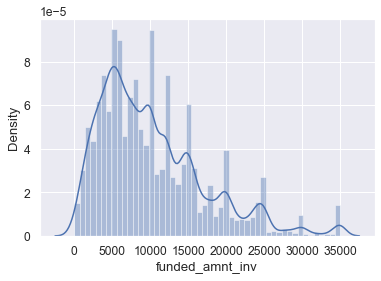

In [367]:
sns.distplot(loan["loan_amnt"])
plt.show()
sns.distplot(loan["funded_amnt"])
plt.show()
sns.distplot(loan["funded_amnt_inv"])
plt.show()

# Observation :
3 loan amounts distirbution plots are similar and is are stongly correlated to each other<br>
distribution of all three amouts are looks very similar , we will look into loan amount for furthur analysis

Loan amount

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

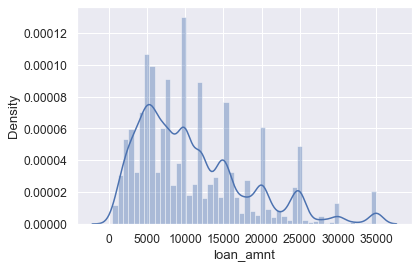

In [368]:
sns.distplot(loan["loan_amnt"])

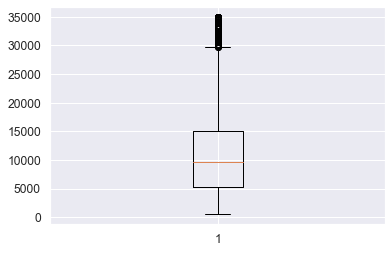

In [369]:
plt.boxplot(loan["loan_amnt"])
plt.show()

# Observations:
from these two plots it is observed that the most of the loans taken form the range 0 to 15000

Interest Rate

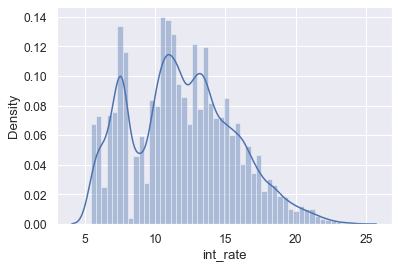

In [370]:
sns.distplot(loan["int_rate"])
plt.show()

<AxesSubplot:>

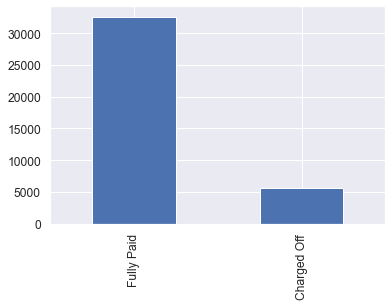

In [371]:
#loan status analysis
loan["loan_status"].value_counts().plot.bar()

# Observations:
more than 5500 loans are charged off

loan_status

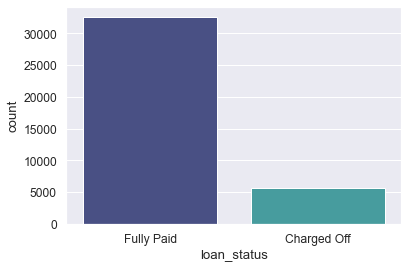

In [372]:
sns.countplot(x="loan_status",data=loan,palette='mako')
plt.show()

percentage of charged off

<AxesSubplot:>

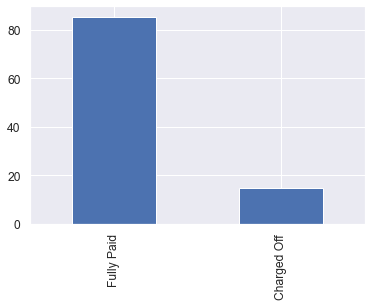

In [373]:
(loan["loan_status"].value_counts()*100/len(loan)).plot.bar()

# observation
its nearlu\y 14 percenatage of loans are charged off

<AxesSubplot:>

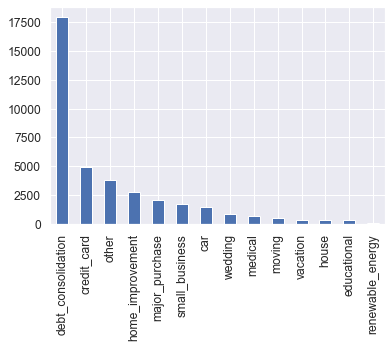

In [374]:
#purpose for taking loan
loan["purpose"].value_counts().plot.bar()

# Observation:
most of the loans taken for the purpose of debt_consolidation, credit_Card 

# Segmented Univatiate Analysis

the purpsoe of loan taken and its loan status

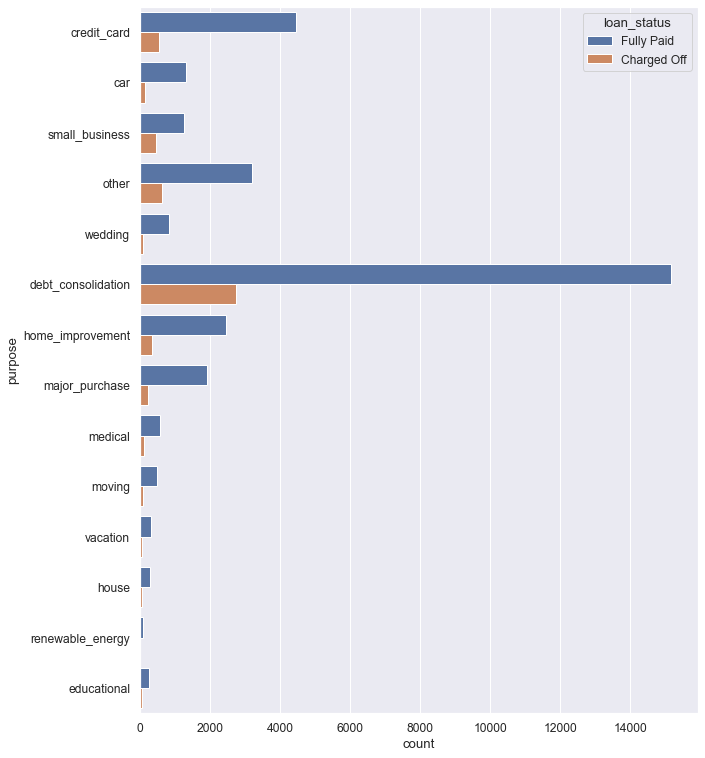

In [375]:
plt.figure(figsize=[10,13])
sns.countplot(data = loan, y="purpose", hue="loan_status", orient="v" )
plt.show()

# Observation:
most loans are charged off when it is deb_consolidation and the credit card bills

Home Owner ship vs loan status

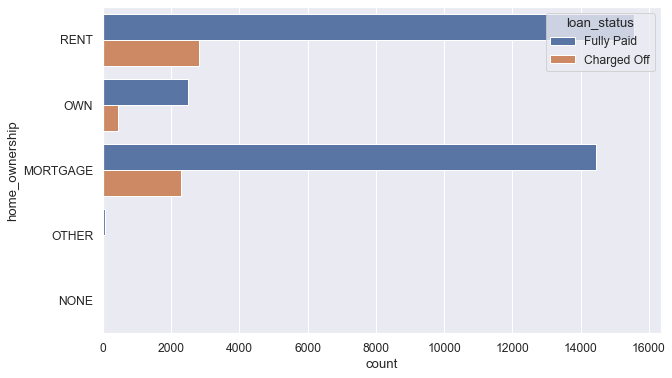

In [376]:
plt.figure(figsize=[10,6])
sns.countplot(data = loan, y="home_ownership", hue="loan_status", orient="v" )
plt.show()

# Observation:
the plot shows that most of them living in rented home or mortgazed their home.
 Applicant numbers are high from these categories so charged off is high too.

Address state VS Loan status

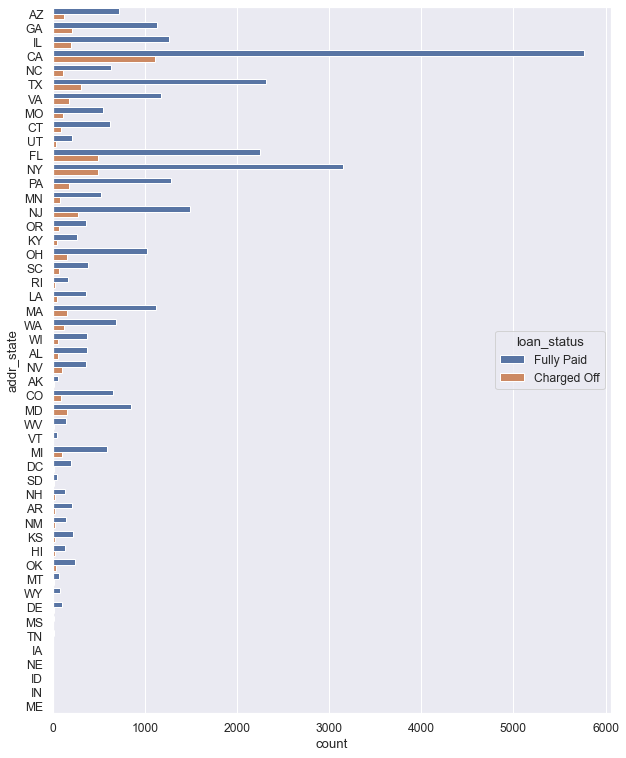

In [377]:
plt.figure(figsize=[10,13])
sns.countplot(data = loan, y="addr_state", hue="loan_status", orient="v" )
plt.show()

Obserrvation : 
    most fully paid loans state is CA nad it is the state most charged off

Term Vs Loan status

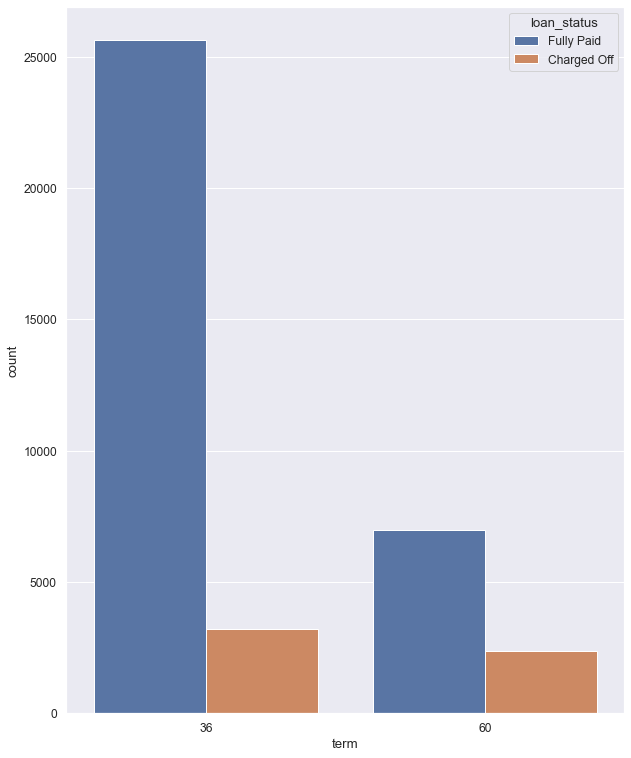

In [378]:
plt.figure(figsize=[10,13])
sns.countplot(data = loan, x="term", hue="loan_status", orient="v" )
plt.show()

Observation : 
    <br>there is a situation 36 months term has been chargedoff mostly than 60 months

Grade Vs Loan status

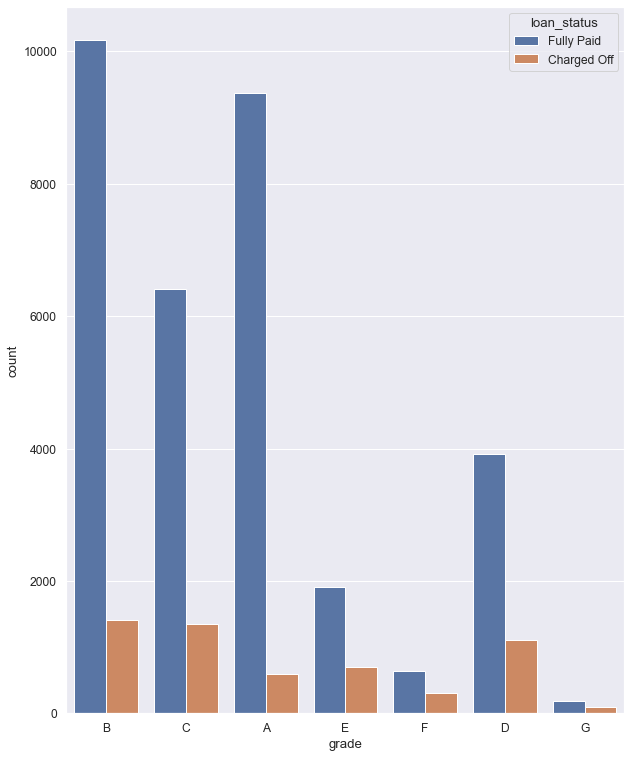

In [379]:
plt.figure(figsize=[10,13])
sns.countplot(data = loan, x="grade", hue="loan_status", orient="v")
plt.show()

Observation : B, C, D grades loans are mostly charged off

<h3>Lets seperate some of the categories to do biivariate analysis</h3>

In [380]:
# For Loan_ maount
loan["loan_amnt"].value_counts()

10000    2787
12000    2230
5000     2018
6000     1879
15000    1821
         ... 
3225        1
13950       1
29175       1
13025       1
28750       1
Name: loan_amnt, Length: 867, dtype: int64

Loan Categories

In [381]:
loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

Annual income categories

In [382]:
loan["annual_inc"].describe()

count     38191.000000
mean      65313.610090
std       35150.773045
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80232.000000
max      234000.000000
Name: annual_inc, dtype: float64

In [383]:
loan['annual_inc_category'] = pd.cut(loan['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

DTI Categories

In [384]:
loan["dti"] = loan["dti"].astype('category')
print(loan["dti"].value_counts())
loan["dti_categories"] = pd.cut(loan["dti"], [0, 5, 10, 15, 20, 25], labels=["0-5", "5-10", "10-15", "15-20", "25+"])

0.0      176
18.0      45
12.0      44
19.2      39
13.2      39
        ... 
28.35      1
28.34      1
28.33      1
28.32      1
29.99      1
Name: dti, Length: 2853, dtype: int64


Interest Rate Categories

In [385]:
loan["int_rate_categories"] = pd.cut(loan['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

Lets check the top 5 rows data in the loan

In [386]:
loan.head(5)

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,recoveries,collection_recovery_fee,last_credit_pull_d,pub_rec_bankruptcies,year,month,loan_amnt_cats,annual_inc_category,dti_categories,int_rate_categories
0,1077501,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,...,0.00,0.00,May-16,0,2011,12,0-7000,20000-40000,NaN,10-13
1,1077430,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,...,117.08,1.11,Sep-13,0,2011,12,0-7000,20000-40000,0-5,12.5-16
2,1077175,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,...,0.00,0.00,May-16,0,2011,12,0-7000,0-20000,5-10,12.5-16
3,1076863,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,0.00,0.00,Apr-16,0,2011,12,7000-14000,40000-60000,15-20,12.5-16
5,1075269,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,...,0.00,0.00,Jan-16,0,2011,12,0-7000,20000-40000,10-15,0-10


lets check the shape of the loan

In [387]:
loan.shape

(38191, 46)

# Bivariate analysis

In [388]:
incomerange = pd.DataFrame(loan, columns=["annual_inc_category", "loan_status"])

In [389]:
incomerange.corr()

""


there is no data  <br>
to check correlation between charged off  loans and income range we need to get the percentage of the charged off

In [390]:
incomeRange_LoanStaus = loan.groupby(['annual_inc_category', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
incomeRange_LoanStaus

loan_status,annual_inc_category,Charged Off,Fully Paid
0,0-20000,237,943
1,20000-40000,1514,7004
2,40000-60000,1729,9534
3,60000-80000,1024,6597
4,80000 +,1080,8529


add nother column charged off proportion is count of charged off/ total no of laon_Status

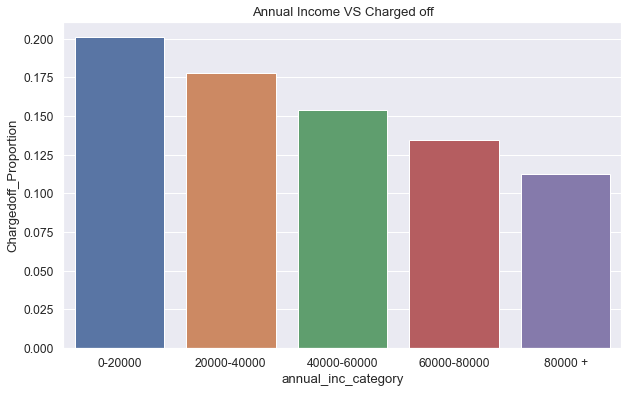

In [391]:
incomeRange_LoanStaus['Chargedoff_Proportion'] = incomeRange_LoanStaus['Charged Off'] / (incomeRange_LoanStaus['Charged Off'] + incomeRange_LoanStaus['Fully Paid'])
plt.figure(figsize=[10,6])
z = sns.barplot(data=incomeRange_LoanStaus, x='annual_inc_category', y="Chargedoff_Proportion")
z.set_title("Annual Income VS Charged off")
plt.show()

# Observations:
1.inceome_range 0-20000 has high chances of charged off<br>
2. income range 80000+ has less chances of charged off<br>
3. it is clear that growth in the income tange has less chances of charged off

Purpose_loan againsaist the loan_status:

In [392]:
#Purpose_loan againsaist the loan_status:

Purpos_VS_Chargedoff = loan.groupby(["purpose", "loan_status"]).loan_status.count().unstack().fillna(0).reset_index()
Purpos_VS_Chargedoff["ChargedOFF_Prop"] = Purpos_VS_Chargedoff["Charged Off"]/(Purpos_VS_Chargedoff["Charged Off"] + Purpos_VS_Chargedoff["Fully Paid"])
Purpos_VS_Chargedoff.sort_values('ChargedOFF_Prop', ascending=True)
Purpos_VS_Chargedoff


loan_status,purpose,Charged Off,Fully Paid,ChargedOFF_Prop
0,car,160,1331,0.107311
1,credit_card,537,4450,0.107680
2,debt_consolidation,2752,15165,0.153597
3,educational,55,268,0.170279
4,home_improvement,338,2459,0.120844
5,house,58,299,0.162465
6,major_purchase,220,1909,0.103335
7,medical,106,568,0.157270
8,moving,91,479,0.159649
9,other,629,3202,0.164187


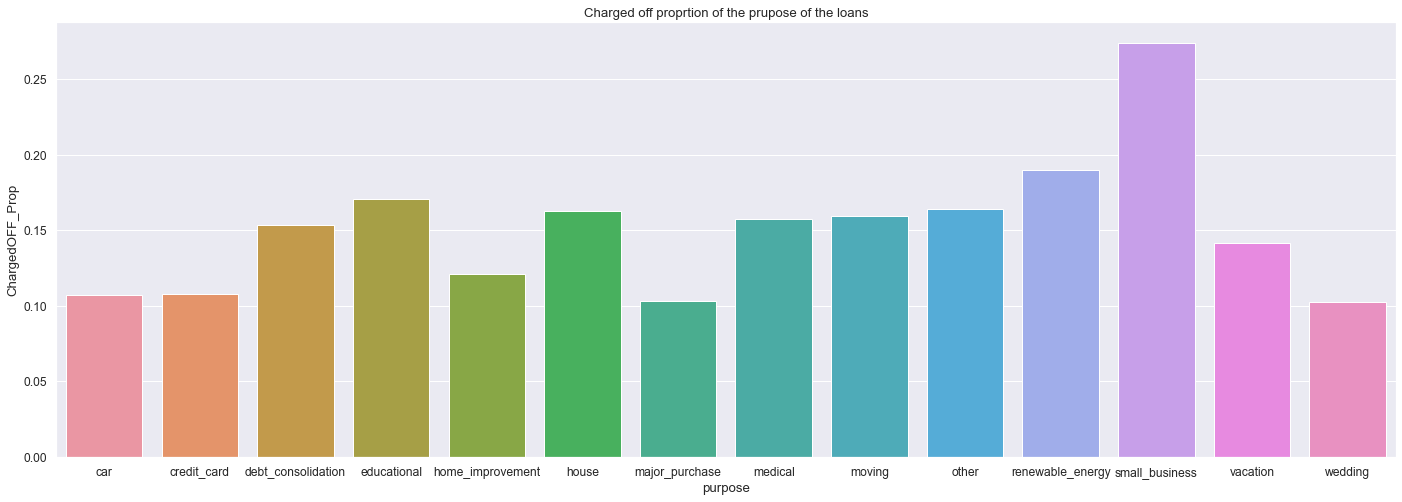

In [393]:
plt.figure(figsize=[24,8])
z = sns.barplot(data=Purpos_VS_Chargedoff, x='purpose', y="ChargedOFF_Prop")
z.set_title("Charged off proprtion of the prupose of the loans")
plt.show()


# observations
1. small_business purpose loans has high chances to be charged off
2. car loans has very low chances to be charged off

term vs charged off propertion

In [394]:
# term vs charged off propertion
colList = ["Charged Off","Fully Paid"]
term_VS_ChargedOff = loan.groupby(["term","loan_status"]).loan_status.count().unstack().fillna(0)
term_VS_ChargedOff["ChargedOff_Prop"] = term_VS_ChargedOff["Charged Off"]/( term_VS_ChargedOff["Charged Off"] +  term_VS_ChargedOff["Fully Paid"])
term_VS_ChargedOff.drop(labels=colList, axis = 1, inplace=True)
term_VS_ChargedOff

loan_status,ChargedOff_Prop
term,
36,0.111073
60,0.254268


<Figure size 1224x1440 with 0 Axes>

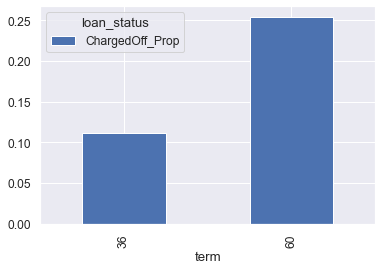

In [395]:
plt.figure(figsize=[17,20])
term_VS_ChargedOff.plot(kind="bar", stacked=True)
plt.show()

# Observations:
1. Charged off propertion is very high when the tenure is 60 months<br>
2.Charged off propertion is low when compared to 60 months

int_Rate vs chargedoff

In [396]:
interest_VS_chargedoff = loan.groupby(["int_rate_categories", "loan_status"]).loan_status.count().unstack()
interest_VS_chargedoff["ChargedOff_Prop"] = interest_VS_chargedoff["Charged Off"]/(interest_VS_chargedoff["Charged Off"] + interest_VS_chargedoff["Fully Paid"])
interest_VS_chargedoff.drop(labels=colList, axis=1, inplace=True)
interest_VS_chargedoff

loan_status,ChargedOff_Prop
int_rate_categories,
0-10,0.067474
10-13,0.131514
12.5-16,0.175802
16 +,0.273703


<Figure size 1224x1440 with 0 Axes>

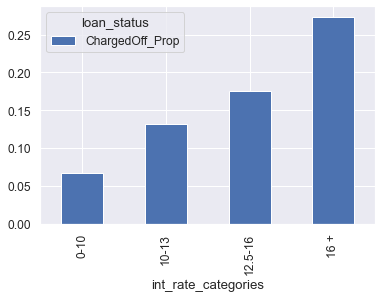

In [397]:
plt.figure(figsize=[17,20])
interest_VS_chargedoff.plot(kind="bar", stacked = True)
plt.show()

# observation:
1. High interest rate has higher chances of charged offM<br>
2.low interst rate hase lower chances of charged off
3.Charged off proportion is increasing with higher intrest rates.

grade VS charged off

In [398]:
#grade VS charged off
grade_VS_chargedOff = loan.groupby(["grade", "loan_status"]).loan_status.count().unstack()
grade_VS_chargedOff["ChargedOff_prop"] = grade_VS_chargedOff["Charged Off"]/(grade_VS_chargedOff["Charged Off"] + grade_VS_chargedOff["Fully Paid"])
grade_VS_chargedOff.drop(labels=colList, axis=1, inplace=True)
grade_VS_chargedOff

loan_status,ChargedOff_prop
grade,
A,0.060239
B,0.122097
C,0.173094
D,0.221205
E,0.269732
F,0.327044
G,0.342561


<Figure size 1224x1440 with 0 Axes>

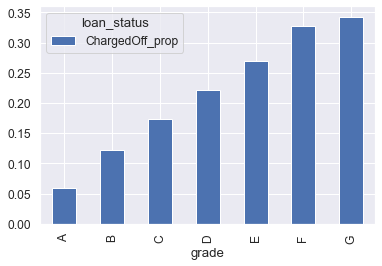

In [399]:
plt.figure(figsize=[17,20])
grade_VS_chargedOff.plot(kind="bar", stacked=True)
plt.show()

# observations:
1. Grade G loans has higer chances of chargedoff
2.grade A loans are lesser chances to be chargedoff
3.Chances of charged off is increasing with grade moving from "A" towards "G"

subgradeVS chargedoff

In [400]:
subGrad_VS_chargedOFf = loan.groupby(["sub_grade", "loan_status"]).loan_status.count().unstack().fillna(0).reset_index()
subGrad_VS_chargedOFf["ChargedOff_Prop"] = subGrad_VS_chargedOFf["Charged Off"]/(subGrad_VS_chargedOFf["Charged Off"] + subGrad_VS_chargedOFf["Fully Paid"])
subGrad_VS_chargedOFf.drop(labels = colList, axis=1, inplace=True)
subGrad_VS_chargedOFf


loan_status,sub_grade,ChargedOff_Prop
0,A1,0.026502
1,A2,0.049366
2,A3,0.057254
3,A4,0.062369
4,A5,0.080208
5,B1,0.095185
6,B2,0.113751
7,B3,0.119986
8,B4,0.135258
9,B5,0.136923


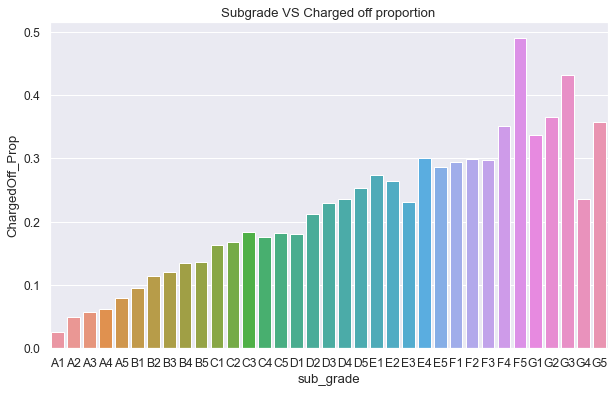

In [401]:
plt.figure(figsize=[10,6])
z=sns.barplot(data=subGrad_VS_chargedOFf, x='sub_grade', y="ChargedOff_Prop")
z.set_title("Subgrade VS Charged off proportion")
plt.show()

# Observations:
1. sub Grades of "A" has very less chances of charged off.
2. sub Grades of "F" and "G" have very high chances of charged off.
3. proportion of charged off is increasing with sub grades moving from sub grades of "A" towards sub grades of "G"
4. proportion of charged off is increasing with sub grades moving from 1 to 5

empLength vs charged OFF

In [402]:
#empLength vs charged OFF
empExp_VS_chargedOFF = loan.groupby(["emp_length", "loan_status"]).loan_status.count().unstack().fillna(0).reset_index()
empExp_VS_chargedOFF["ChargedOff_Prop"] = round(empExp_VS_chargedOFF["Charged Off"]/(empExp_VS_chargedOFF["Charged Off"] + empExp_VS_chargedOFF["Fully Paid"]), 2)
empExp_VS_chargedOFF.sort_values('ChargedOff_Prop', ascending=True)
empExp_VS_chargedOFF

loan_status,emp_length,Charged Off,Fully Paid,ChargedOff_Prop
0,1,1090,6532,0.14
1,2,561,3684,0.13
2,3,551,3426,0.14
3,4,456,2859,0.14
4,5,456,2712,0.14
5,6,305,1846,0.14
6,7,262,1435,0.15
7,8,203,1216,0.14
8,9,157,1058,0.13
9,10,1316,7038,0.16


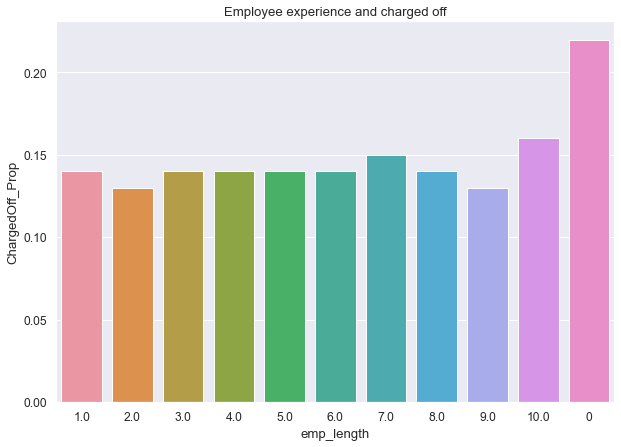

In [403]:
plt.figure(figsize=[10,7])
z = sns.barplot(data=empExp_VS_chargedOFF, x='emp_length', y="ChargedOff_Prop")
z.set_title("Employee experience and charged off")
plt.show()

# Observations:
1. Those who are not working or have less than 1 year of work experience have high chances of getting charged off.
2. that makes sense as with less or no experience they don't have source of income to repay loan.
3. Rest of the applicants have more or less same chnaces of getting charged off.

HomeOwner shipe VS charged off

In [404]:
homeOwership_VS_chargedOFF = loan.groupby(["home_ownership", "loan_status"]).loan_status.count().unstack().fillna(0).reset_index()
homeOwership_VS_chargedOFF["ChargedOff_Prop"] = homeOwership_VS_chargedOFF["Charged Off"]/( homeOwership_VS_chargedOFF["Charged Off"] + homeOwership_VS_chargedOFF["Fully Paid"])
homeOwership_VS_chargedOFF.sort_values('ChargedOff_Prop', ascending=True)
homeOwership_VS_chargedOFF

loan_status,home_ownership,Charged Off,Fully Paid,ChargedOff_Prop
0,MORTGAGE,2302.0,14446.0,0.137449
1,NONE,0.0,3.0,0.000000
2,OTHER,18.0,78.0,0.187500
3,OWN,440.0,2507.0,0.149304
4,RENT,2824.0,15573.0,0.153503


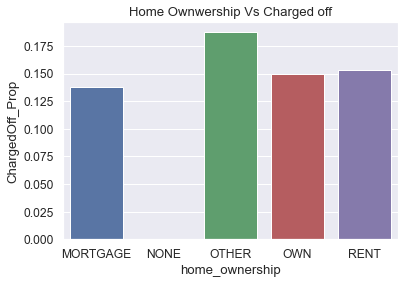

In [405]:
z = sns.barplot(data = homeOwership_VS_chargedOFF, x="home_ownership", y="ChargedOff_Prop")
z.set_title('Home Ownwership Vs Charged off');

# Observation: 
1. Mortage and rent home ownership has hig propotion of charged off when compared to others.

dti vs charge off dti_categories

In [406]:
dti_VS_chargedOFF = loan.groupby(["dti_categories", "loan_status"]).loan_status.count().unstack().fillna(0).reset_index()
dti_VS_chargedOFF["ChargedOff_Prop"] = dti_VS_chargedOFF["Charged Off"]/( dti_VS_chargedOFF["Charged Off"] + dti_VS_chargedOFF["Fully Paid"])
dti_VS_chargedOFF.sort_values('ChargedOff_Prop', ascending=True)
dti_VS_chargedOFF

loan_status,dti_categories,Charged Off,Fully Paid,ChargedOff_Prop
0,0-5,580,4157,0.122440
1,5-10,996,6749,0.128599
2,10-15,1392,8164,0.145668
3,15-20,1385,7399,0.157673
4,25+,1116,5455,0.169837


Text(0.5, 1.0, 'DTI VS Charged OFF')

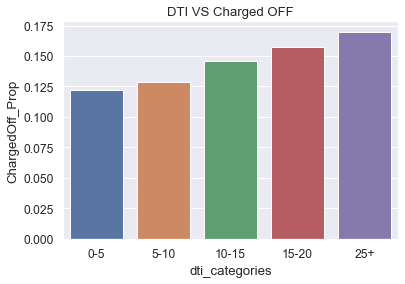

In [407]:
z = sns.barplot(data=dti_VS_chargedOFF, x="dti_categories", y="ChargedOff_Prop")
z.set_title("DTI VS Charged OFF")

# observations:
1. dti 25+ has higher chances of charged off
2. higher the DTI has the higher chances of risk

ISsude_month vs charged off

In [408]:
# ISsude_month vs charged off
month_VS_chargedoff = loan.groupby(["month", "loan_status"]).loan_status.count().unstack().fillna(0).reset_index()
month_VS_chargedoff["ChargedOff_Prop"] = month_VS_chargedoff["Charged Off"]/( month_VS_chargedoff["Charged Off"] + month_VS_chargedoff["Fully Paid"])
month_VS_chargedoff.sort_values('ChargedOff_Prop', ascending=True)
month_VS_chargedoff

loan_status,month,Charged Off,Fully Paid,ChargedOff_Prop
0,1,317,2037,0.134664
1,2,288,2049,0.123235
2,3,344,2315,0.129372
3,4,368,2440,0.131054
4,5,462,2425,0.160028
5,6,480,2666,0.152575
6,7,475,2846,0.143029
7,8,465,2898,0.138269
8,9,545,2918,0.157378
9,10,572,3137,0.154219


Text(0.5, 1.0, 'Month VS Charged OFF')

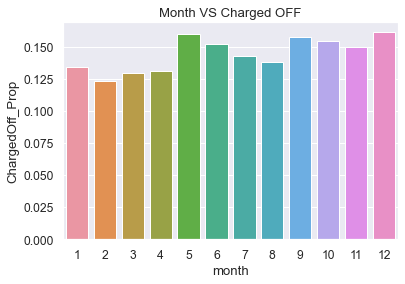

In [409]:
z = sns.barplot(data = month_VS_chargedoff, x="month", y = "ChargedOff_Prop")
z.set_title("Month VS Charged OFF")

verificationstatus VS charged off

In [410]:
Verification_VS_cahrgedOFF = loan.groupby(["verification_status", "loan_status"]).loan_status.count().unstack().reset_index()
Verification_VS_cahrgedOFF["ChargedOff_Prop"] = round(Verification_VS_cahrgedOFF["Charged Off"]/( Verification_VS_cahrgedOFF["Charged Off"] + Verification_VS_cahrgedOFF["Fully Paid"]), 2)
Verification_VS_cahrgedOFF.sort_values('ChargedOff_Prop', ascending=True)
Verification_VS_cahrgedOFF

loan_status,verification_status,Charged Off,Fully Paid,ChargedOff_Prop
0,Not Verified,2130,14474,0.13
1,Source Verified,1422,8134,0.15
2,Verified,2032,9999,0.17


<AxesSubplot:xlabel='verification_status', ylabel='ChargedOff_Prop'>

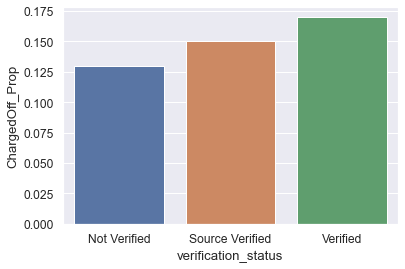

In [411]:
sns.barplot(data=Verification_VS_cahrgedOFF, x="verification_status", y= "ChargedOff_Prop")

# Observations:
1.There is not much difference in charged off proportion.<br>
2.This variable doesn't provide any insights for charged off.

address state VS Charged OFF

In [412]:
State_VS_chargedOFF = loan.groupby(["addr_state", "loan_status"]).loan_status.count().unstack().fillna(0).reset_index()
State_VS_chargedOFF["ChargedOff_Prop"] =round(State_VS_chargedOFF["Charged Off"]/( State_VS_chargedOFF["Charged Off"] +  State_VS_chargedOFF["Fully Paid"]),2)
State_VS_chargedOFF.sort_values('ChargedOff_Prop', ascending=True)
State_VS_chargedOFF

loan_status,addr_state,Charged Off,Fully Paid,ChargedOff_Prop
0,AK,14.0,63.0,0.18
1,AL,54.0,378.0,0.12
2,AR,27.0,208.0,0.11
3,AZ,121.0,718.0,0.14
4,CA,1116.0,5766.0,0.16
5,CO,97.0,659.0,0.13
6,CT,94.0,618.0,0.13
7,DC,15.0,196.0,0.07
8,DE,12.0,101.0,0.11
9,FL,497.0,2252.0,0.18


Text(0.5, 1.0, 'State vs Charged off')

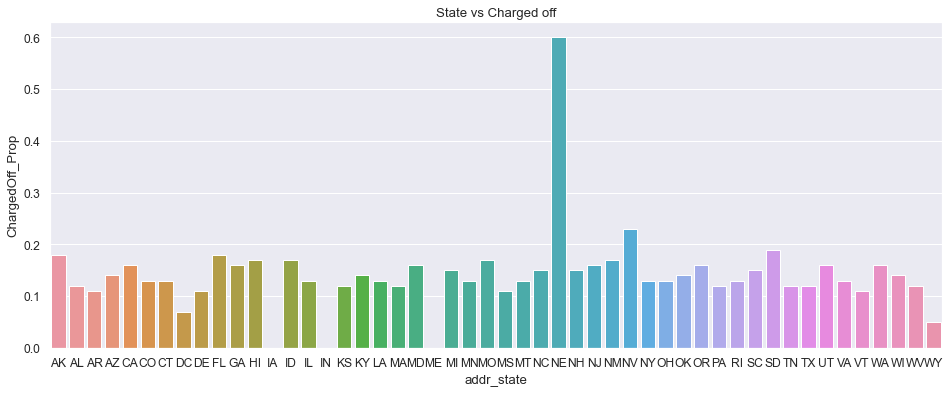

In [413]:
plt.figure(figsize=(16, 6))
z = sns.barplot(data=State_VS_chargedOFF, x="addr_state", y="ChargedOff_Prop")
z.set_title("State vs Charged off")

# Observations:
1.states NE has very high chances of charged off but number of applications are too low to make any decisions.<br>
2. NV,CA and FL states shows good number of charged offs in good number of applications.

BarPlot to show variation of annual income across grade for every loan status.

<AxesSubplot:xlabel='grade', ylabel='annual_inc'>

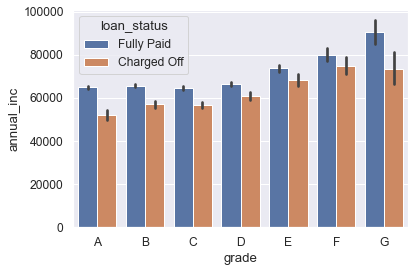

In [414]:
sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loan, estimator=np.mean, order='ABCDEFG')

# Observations:
by seeing this we can conclude that the ones who charged off has more lower income than the ones who paid the loan fully and current paying

BarPlot to show variation of interst rate across purpose for every loan status.

<AxesSubplot:xlabel='int_rate', ylabel='purpose'>

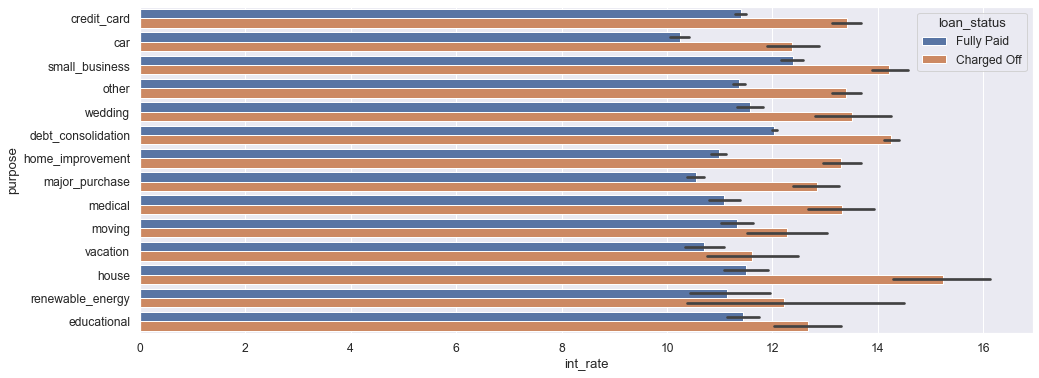

In [415]:
plt.figure(figsize=(16, 6))
sns.barplot(x='int_rate', y='purpose', hue="loan_status", data=loan, estimator=np.mean)

# Observations:
by seeing this it is clear that every charged off of a purpose has higher interest rate

BarPlot to show variation of term across loan_amnt_cats for every loan status.

In [416]:
loanAmnt_term_VS_loanStatus = loan.groupby(["term", "loan_amnt_cats","loan_status"]).loan_status.count().unstack().fillna(0).reset_index()
loanAmnt_term_VS_loanStatus["ChargedOff_Prop"] =round(loanAmnt_term_VS_loanStatus["Charged Off"]/( loanAmnt_term_VS_loanStatus["Charged Off"]+ loanAmnt_term_VS_loanStatus["Fully Paid"]),2)
loanAmnt_term_VS_loanStatus.sort_values('ChargedOff_Prop', ascending=True)
loanAmnt_term_VS_loanStatus

loan_status,term,loan_amnt_cats,Charged Off,Fully Paid,ChargedOff_Prop
0,36,0-7000,1452,11123,0.12
1,36,7000-14000,1083,9259,0.10
2,36,14000-21000,463,3789,0.11
3,36,21000-28000,177,1207,0.13
4,36,28000 +,26,240,0.10
5,60,0-7000,429,1250,0.26
6,60,7000-14000,697,2175,0.24
7,60,14000-21000,681,2027,0.25
8,60,21000-28000,349,969,0.26
9,60,28000 +,227,568,0.29


<AxesSubplot:xlabel='term', ylabel='ChargedOff_Prop'>

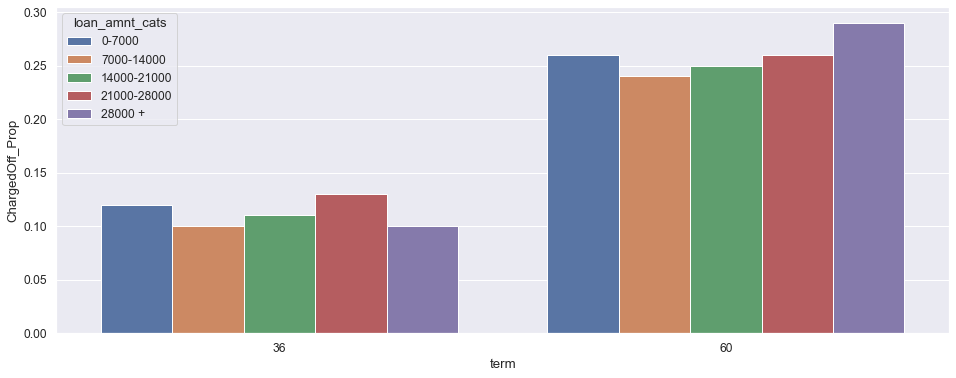

In [417]:
plt.figure(figsize=(16, 6))
sns.barplot(data=loanAmnt_term_VS_loanStatus, x="term", y="ChargedOff_Prop", hue="loan_amnt_cats")

# Observations:
1. By seeing this charged off proportion got increased where increase ing the loan amount

 BarPlot to show variation of interst rate across grade for every loan status.

Text(0.5, 1.0, ' Interest Rate and grade VS charged off')

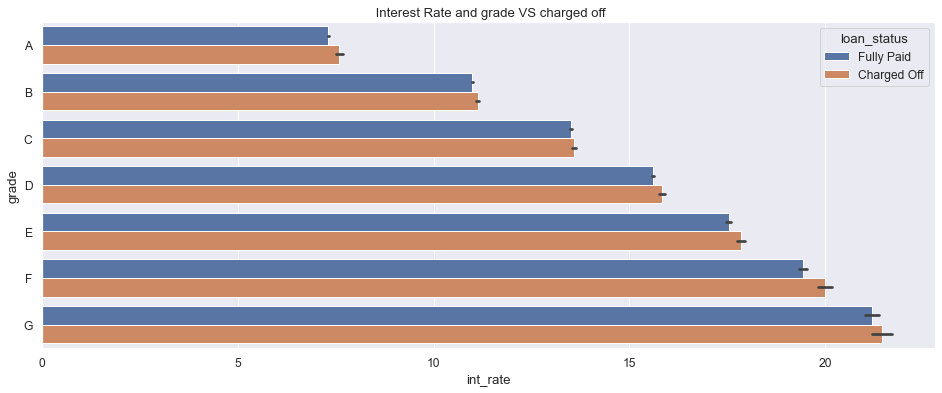

In [418]:
plt.figure(figsize=(16, 6))
z = sns.barplot(x='int_rate', y='grade', hue="loan_status", data=loan, estimator=np.mean, order='ABCDEFG')
z.set_title(" Interest Rate and grade VS charged off")

# Observation
1. By seeing the plot it is observed that from the grad A to G it is increased in interest rate and increased in charged off 

BarPlot to show variation of interst rate across grade for every loan status.

<AxesSubplot:xlabel='int_rate_categories', ylabel='term'>

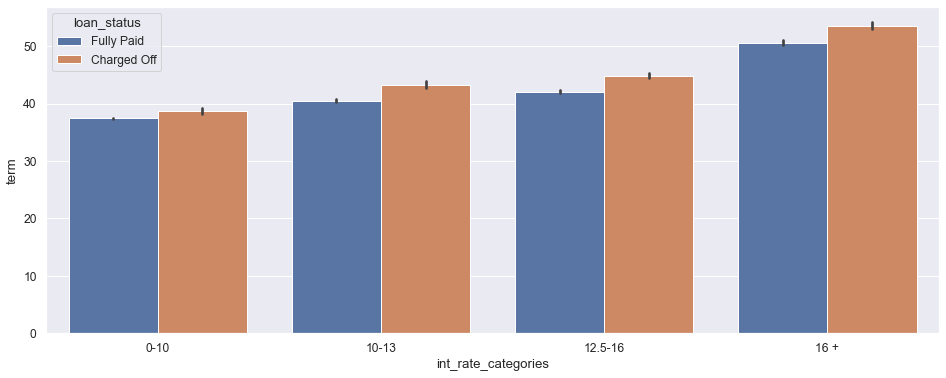

In [419]:
plt.figure(figsize=(16, 6))
sns.barplot(x='int_rate_categories', y='term', hue="loan_status", data=loan, estimator=np.mean)

# Observations:
1. By seeing the polt it is observed that the increased in interest rate and term increases the charged off

BarPlot to show variation of interst rate across year for every loan status.

<AxesSubplot:xlabel='year', ylabel='int_rate'>

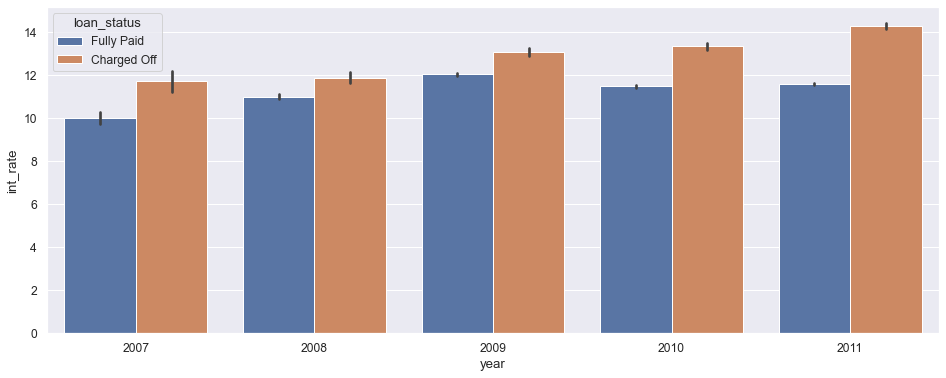

In [420]:
plt.figure(figsize=(16, 6))
sns.barplot(x='year', y='int_rate', hue="loan_status", data=loan, estimator=np.mean)

# Observations:
it is clear that change in increasing the year is increasing the interest rate
obiviously increase in the interest rate increase in the charged off

In [421]:
loanAmnt_year_VS_loanStatus = loan.groupby(["year", "loan_status"]).loan_status.count().unstack().fillna(0).reset_index()
loanAmnt_year_VS_loanStatus["ChargedOff_Prop"] =round(loanAmnt_year_VS_loanStatus["Charged Off"]/( loanAmnt_year_VS_loanStatus["Charged Off"]+ loanAmnt_year_VS_loanStatus["Fully Paid"]),2)
loanAmnt_year_VS_loanStatus.sort_values('ChargedOff_Prop', ascending=True)
loanAmnt_year_VS_loanStatus["Total"] = loanAmnt_year_VS_loanStatus["Charged Off"]+ loanAmnt_year_VS_loanStatus["Fully Paid"]

loanAmnt_year_VS_loanStatus

loan_status,year,Charged Off,Fully Paid,ChargedOff_Prop,Total
0,2007,43,204,0.17,247
1,2008,246,1306,0.16,1552
2,2009,590,4072,0.13,4662
3,2010,1466,9946,0.13,11412
4,2011,3239,17079,0.16,20318


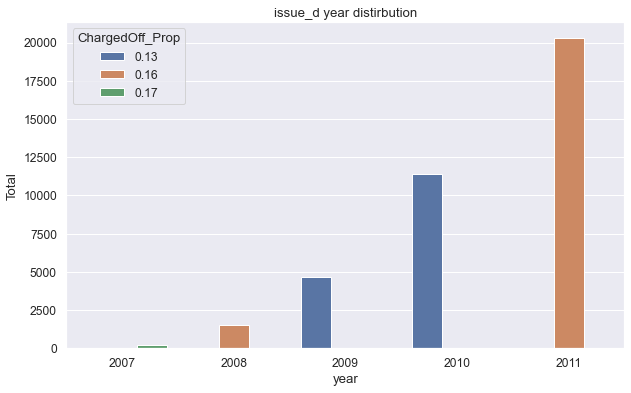

In [422]:
plt.figure(figsize=(10, 6))
z=sns.barplot(data=loanAmnt_year_VS_loanStatus, x="year", y="Total", hue="ChargedOff_Prop")
z.set_title('issue_d year distirbution');

In [423]:
loanAmnt_month_VS_loanStatus = loan.groupby(["month", "loan_status"]).loan_status.count().unstack().fillna(0).reset_index()
loanAmnt_month_VS_loanStatus["ChargedOff_Prop"] =round(loanAmnt_month_VS_loanStatus["Charged Off"]/( loanAmnt_month_VS_loanStatus["Charged Off"]+ loanAmnt_month_VS_loanStatus["Fully Paid"]),2)
loanAmnt_month_VS_loanStatus.sort_values('ChargedOff_Prop', ascending=False)
loanAmnt_month_VS_loanStatus["Total"] = loanAmnt_month_VS_loanStatus["Charged Off"]+ loanAmnt_month_VS_loanStatus["Fully Paid"]
loanAmnt_month_VS_loanStatus

loan_status,month,Charged Off,Fully Paid,ChargedOff_Prop,Total
0,1,317,2037,0.13,2354
1,2,288,2049,0.12,2337
2,3,344,2315,0.13,2659
3,4,368,2440,0.13,2808
4,5,462,2425,0.16,2887
5,6,480,2666,0.15,3146
6,7,475,2846,0.14,3321
7,8,465,2898,0.14,3363
8,9,545,2918,0.16,3463
9,10,572,3137,0.15,3709


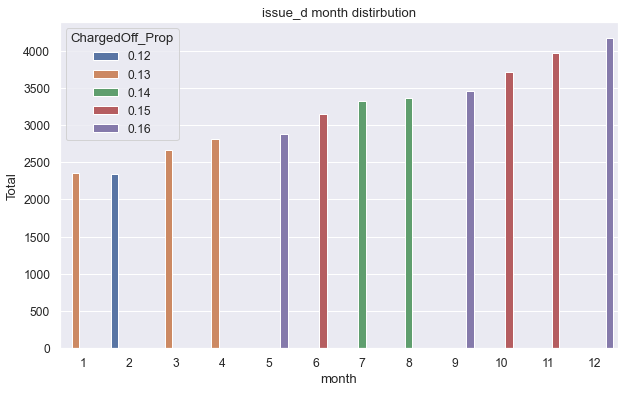

In [424]:
plt.figure(figsize=(10, 6))
z = sns.barplot(data=loanAmnt_month_VS_loanStatus, x="month", y="Total", hue="ChargedOff_Prop")
z.set_title('issue_d month distirbution');

# Observations for month,year of issue_d
1. Lending club expanded year by year, and the no of loans issued also doubled every year
2. issued month of loans also increased from jan to dec, final quarter it is issued more loans may be of christmas and charged of percentage is also high 

# Recomendations
1. Higher the loan amonunt and Higer interest has more chances to be deafault.
2. 60 months term loans has higer interest adn they prone to default
3. Lower income range people and less experience people (0 or 1 ) who has not income are most likely to default
4. some grades has higher interest rate and from Low grade to higer grade has higer to lower chances of default.
5. Hihger the DTI has the Higher chances of default the loans
6. small business purposes loans are defaulted more. Lending club should take care while borrowing the loans for this purpose.
7. NV, CA, FL states has more number of applicants and more the defaulted loans